In [ ]:
%cd /content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [ ]:
# libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
#load the data
df = pd.read_csv("diamond.csv")

In [ ]:
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


DATA PREPERATION

In [ ]:
# ISOLATE X & Y
y = df.price
x = df.carat

In [ ]:
y
x

0      0.30
1      0.30
2      0.30
3      0.30
4      0.31
       ... 
303    1.01
304    1.02
305    1.06
306    1.02
307    1.09
Name: carat, Length: 308, dtype: float64

In [ ]:
# adding constant
x = sm.add_constant(x)
x.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


Linear regression


In [ ]:
# Regression Model
model1 = sm.OLS(endog = y,exog = x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          3.04e-150
Time:                        19:54:34   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'price')

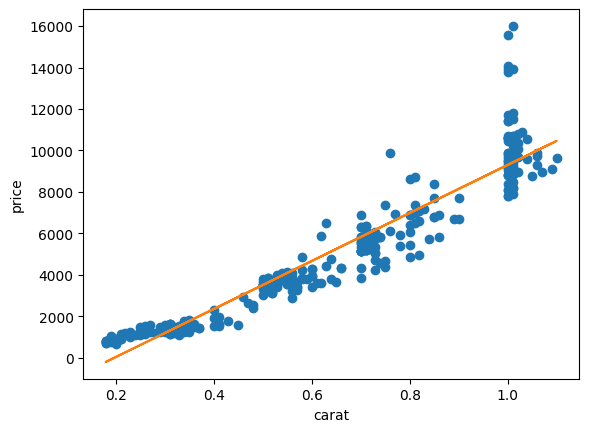

In [ ]:
#plotting
x = df.carat
plt.plot(x,y,"o")
b, a = np.polyfit(x,y,1)
plt.plot(x, b*x+a)
plt.xlabel("carat")
plt.ylabel("price")

# Linear regression with dummy variables

In [ ]:
# LOOK AT CARAT VARIABLE
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [ ]:
#create binary variables
df["carat_binary"] = np.where(df.carat > 0.6, 1,0)
df.head(3)

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.3,D,VS2,GIA,1302,0
1,2,0.3,E,VS1,GIA,1510,0
2,3,0.3,G,VVS1,GIA,1510,0


# challenge : create linear regression with binary varaible and plot.


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.79e-73
Time:                        20:51:42   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'price')

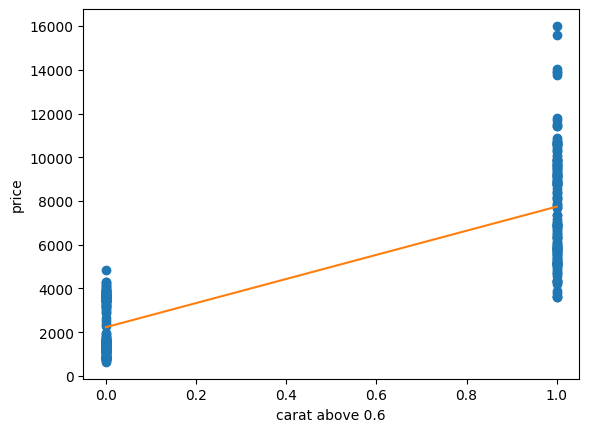

In [ ]:
x = df.carat_binary
y = df.price
x = sm.add_constant(x)
x
model_bin = sm.OLS(endog = y,exog = x).fit()
print(model_bin.summary())
x = df.carat_binary
plt.plot(x,y,"o")
b, a = np.polyfit(x,y,1)
plt.plot(x,b*x+a)
plt.xlabel("carat above 0.6")
plt.ylabel("price")